# DL4NLP SS17 Home Exercise 02
----------------------------------
**Due until Tuesday, 02.05. at 13:00**

## Task 1 Mandatory Video (1P)
Watch [this week's mandatory video](https://www.youtube.com/watch?v=GUtlrDbHhJM&t=277s&list=PLlJy-eBtNFt6EuMxFYRiNRS07MCWN5UIA&index=5) and answer the following question: Which six activation functions are discussed during the talk?

Hint: They are shown on a summary slide among the first 30 slides.

## Task 2 Sentiment Polarity in Movie Reviews (9P)
The movie-review dataset (http://www.cs.cornell.edu/people/pabo/movie-review-data/) consists of movie reviews labeled with sentiment polarity (i.e. "positive review" or "negative review"). Your task is to implement a variation of the perceptron from last week which learns to identify the sentiment in a review.

#### Data
In the `hex02_data` archive, you can find a training, development and test dataset. Each line in these datasets has three entries, separated by a tab character (`\t`). The first is the movie review (available only for reference), the second is the sentiment label (`POS`itive or `NEG`ative). To facilitate the task, the third entry is a 100-dimensional vector representing the review (we'll cover in later lectures on *word embeddings* how this sentence representation has been generated).

#### Perceptron
* As the loss function, choose square-loss:
\begin{equation}
    L = \sum_{j=1}^N \ell(\mathbf{x}_j, y) = \sum_{j=1}^N (\sigma(\mathbf{x}_j \cdot \mathbf{w}) - y_j)^2
\end{equation}
* For the activation function, use the sigmoid function.

* For the weight update rule, use the following mini-batch stochastic gradient descent formula:
\begin{equation}
    w' \leftarrow w - \frac{\alpha}{|\mathcal{T}'|} \cdot \sum_{(\mathbf{x},y)\in\mathcal{T}'} \Bigl(\sigma(\mathbf{x} \cdot \mathbf{w}) - y\Bigr) \cdot \sigma'(\mathbf{x} \cdot \mathbf{w}) \cdot x^T
\end{equation}
Reminder: $\mathcal{T'}$ is a mini-batch; a random subset of the whole training data $\mathcal{T}$. A typical way of implementing random mini-batches is to randomly shuffle the whole training dataset before each epoch, then divide the training dataset into batches of size $|\mathcal{T'}|$. Consider setting the numpy random seed for reproducible results.

* Use the 100-dimensional vectors from the datasets for the input vectors $\mathbf{x}$. Encode the corresponding label as $y=1$ for `POS` and $y=0$ for `NEG` (i.e. according to the co-domain of the sigmoid activation function). **Append a trailing 1 to each input vector $\mathbf{x}$ for the bias (cf. lecture 01, slide 92).**

* Initialize the weight vector via `w=np.random.normal(0,1,(N,1))`, where $N$ is the dimensionality of your input data.

#### Hints on the Submission Format
* Please submit your python code for all the tasks where it is applicable. Make sure to include comments explaining complicated/non-obvious sections of your code.
* Please also submit a copy of the console output of your code execution. Your code might run in 10 minutes on your watercooled battlestation, but it might not run in 10 minutes for the person who corrects your home exercises. Thank you!


### Task 2.1 Dataset reader (1P)
Implement a reader for the dataset files which returns the input vectors $\mathbf{x}$ and labels $y$ as numpy arrays. The shape and number of returned arrays is up to you.

### Task 2.2 Numpy implementation (5P)

a) Implement the perceptron stated above only using numpy. Include a method which computes the square loss and the accuracy of the model, given a dataset and a weight vector `w`. (3P)

Hint: In order to compute the accuracy, you need to find a meaningful way to interpret your perceptron's prediction $\sigma(\mathbf{x} \cdot \mathbf{w})$ for a given test input $\mathbf{x}$ and trained weights $\mathbf{w}$.

b) Train your perceptron on the training data and observe its accuracy on the **development** set. Start with batch size $|\mathcal{T}'| = 10$, learning rate $\alpha = 0.01$ and 100 epochs. Experiment with different values for these three hyperparameters. Can you find a configuration which beats 70% accuracy on the development set? Report your best configuration and both the loss and accuracy it reaches on the **development and test** sets. (1P)

c) Create a plot similar to the one from lecture 02, slide 18, i.e. plot the loss on the training set and the development set vs. the number of training epochs. For this purpose, run your perceptron with batch size $|\mathcal{T}'| = 1$ and learning rate $\alpha = 0.001$ for a large number of epochs (>2500). Which number of epochs is reasonable? Why does the loss on the development set **not** increase over time, contrary to the figure from the lecture? (1P)

Hint: For comparable results in the plot, normalize the loss by the number of instances in the training/test dataset.

### Task 2.3 TensorFlow (3P)
[Install TensorFlow](https://www.tensorflow.org/install/) on your machine and reimplement the perceptron with TensorFlow. Using the initial hyperparameter configuration mentioned in Task 2.2 b), [compare the runtime](http://stackoverflow.com/a/7370824) for training your TensorFlow and your numpy perceptrons for an average of 10 executions. Which one runs faster on your machine?

# Answer

## Task 1

Sigmoid function
ReLu
Leaky ReLu
Maxout
Tanh
ELU

## Task 2.1

In [4]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [5]:
Train = open("./DATA/rt-polarity.train.vecs","r").read()
Test = open("./DATA/rt-polarity.test.vecs","r").read()
Dev = open("./DATA/rt-polarity.dev.vecs","r").read()

## Task 2.2 
(a)  Implement the perceptron stated above only using numpy. Include a method which computes the square loss and the accuracy of the model, given a dataset and a weight vector w. 

In [6]:
# define function and update rule here
# split the data into vectors and labels
def Split_data(dataset):
    Vec = []
    Y = []
    p = 0
    for m in dataset.split('\n'):  # split each line
        for n in m.split('\t'):   # split according to \t
            if p == 2 :
                Vec.append(n)     # append vector
                p = 0
            elif p == 1 :
                Y.append(int(n=='label=POS')) # append class
                p = 2
            else:
                p = 1
    x_vec = []
    X_vec = []
    for m in Vec:
        for n in m.split(' '):
            x_vec.append(float(n))      # transfer string into number
        X_vec.append(x_vec)
        x_vec = []
    Y = np.array(Y)
    return np.array(X_vec), Y[:,np.newaxis]    # X is word vector , Y is label

# shuffle the data
def batch(X,Y):
    input = list(zip(Y,X))
    random.shuffle(input)
    np.random.seed(0)
    mini_batch = np.random.randint(15)
    input_data = [m[1] for m in input]
    input_label = [m[0] for m in input]
    X_set = input_data[:mini_batch]
    Y_set = input_label[:mini_batch]
    X_set = np.array(X_set)
    one = np.ones(len(X_set)).T
    one = one[:,np.newaxis]
    X_set = np.hstack((X_set,one))
    return X_set,np.array(Y_set)

# sigmoid function 
def sig(x):
    return 1 / (1 + np.exp(-x))
    
# derivative of sigmoid
def dsig(x):
    return sig(x) * (1-sig(x))

# update of weights
def update(w_old,x_batch,y_batch,alpha,batch_size):
    y_pred = sig(np.dot(x_batch , w_old))
    s_sig = sum(y_pred - y_batch)
    tmp = np.dot(x_batch.T,dsig(y_pred))
    w_new = w_old - (alpha/batch_size)*s_sig* tmp
    return w_new

# Loss
def square_loss(y_true,y_pred):
    loss = np.multiply(y_pred-y_true,y_pred-y_true)
    return np.sum(loss)

def append_one(Data):
    one = np.ones(len(Data)).T
    one = one[:,np.newaxis]
    Data = np.hstack((Data,one))
    return Data
    
# Accuracy
def accuracy(y_true,y_pred):
    n = 0
    for m in range(len(y_true)):
        n+= int(y_true[m] == np.rint(y_pred[m]))
    return n/len(y_true)

b) Train your perceptron on the training data and observe its accuracy on the **development** set. Start with batch size $|\mathcal{T}'| = 10$, learning rate $\alpha = 0.01$ and 100 epochs. Experiment with different values for these three hyperparameters. Can you find a configuration which beats 70% accuracy on the development set? Report your best configuration and both the loss and accuracy it reaches on the **development and test** sets.


In [102]:
import time
start = time.time()

X_train, Y_train = Split_data(Train)
X_test, Y_test = Split_data(Test)
X_dev, Y_dev = Split_data(Dev)

batch_size = 15
alpha = 0.01
N = 100

w = np.random.normal(0,1,(N,1))
w_old = np.vstack((w,1))

for episode in range(100):
    x_batch,y_batch=batch(X_train,Y_train)
    w_new = update(w_old,x_batch,y_batch,alpha,batch_size)
    w_old = w_new
    
y_pred = sig(np.dot(append_one(X_train),w_new))
print("Accuracy of Training set:",accuracy(y_batch,y_pred))
print("Loss of Training set:",square_loss(Y_train,y_pred))  

y_after = sig(np.dot(append_one(X_test),w_new))
print("Accuracy of testing set:",accuracy(Y_test,y_after))
print("Loss of testing set:",square_loss(Y_test,y_after))

y_d = sig(np.dot(append_one(X_dev),w_new))
print("Accuracy of development set:",accuracy(Y_dev,y_d))
print("Loss of development set:",square_loss(Y_dev,y_d))

end = time.time()
print("Total time: ", end - start)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in exp


Accuracy of Training set: 0.75
Loss of Training set: 3613.15833052
Accuracy of testing set: 0.5240775484677924
Loss of testing set: 755.013098185
Accuracy of development set: 0.5178236397748592
Loss of development set: 769.978097927
Total time:  1.716881513595581


c) Create a plot similar to the one from lecture 02, slide 18, i.e. plot the loss on the training set and the development set vs. the number of training epochs. For this purpose, run your perceptron with batch size $|\mathcal{T}'| = 1$ and learning rate $\alpha = 0.001$ for a large number of epochs (>2500). Which number of epochs is reasonable? Why does the loss on the development set **not** increase over time, contrary to the figure from the lecture? 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in exp


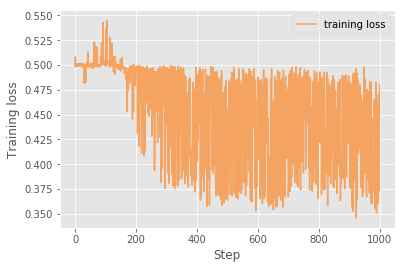

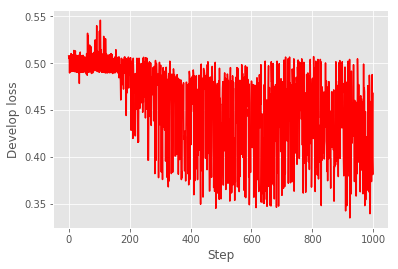

In [81]:
batch_size = 1
alpha = 0.01
epoch = 1000

w = np.random.normal(0,1,(100,1))
w_old = np.vstack((w,1))

Loss_t = []
Step = []
Loss_d = []

length_train = len(Y_train)
length_dev = len(Y_dev)

for episode in range(epoch):
    x_batch,y_batch=batch(X_train,Y_train)
    w_new = update(w_old,x_batch,y_batch,alpha,batch_size)
    w_old = w_new
    y_pred = sig(np.dot(append_one(X_train),w_new))
    Loss_t.append(square_loss(Y_train,y_pred)/length_train)
    Step.append(episode)
    y_dev = sig(np.dot(append_one(X_dev),w_new))
    Loss_d.append(square_loss(Y_dev,y_dev)/length_dev)   
    
style.use('ggplot')
plt.figure(0)
plt.plot(Step,Loss_t,'sandybrown',label='training loss')
plt.legend()
plt.ylabel('Training loss')
plt.xlabel('Step')
plt.figure(1)
plt.plot(Step,Loss_d,'red',label='develop loss')
plt.ylabel('Develop loss')
plt.xlabel('Step')
plt.show()

As we can see above, the loss is not converged. Instead, it keeps fluctuation heavily in both cases. In theory, the training loss will be lower wiht the increasing of step size.

## Task 2.3

In [22]:
import tensorflow as tf
import time
start = time.time()

# Load data
X_train, Y_train = Split_data(Train)
X_test, Y_test = Split_data(Test)
X_dev, Y_dev = Split_data(Dev)

batch_size = 15
alpha = 0.01
epoch = 100

length_train = len(Y_train)
length_test = len(Y_test)
length_dev = len(Y_dev)

# shuffle the data
def batch(X_set,Y_set):
    input = list(zip(Y_set,X_set))
    random.shuffle(input)
    np.random.seed(0)
    mini_batch = np.random.randint(15)
    input_data = [m[1] for m in input]
    input_label = [m[0] for m in input]
    X_set = input_data[:mini_batch]
    Y_set = input_label[:mini_batch]
    return np.array(X_set),np.array(Y_set)

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape,stddev=0.01))

def model(X, w, b):
    return tf.sigmoid(tf.matmul(X,w)+b)

X = tf.placeholder(tf.float32, [None,100])
Y = tf.placeholder(tf.float32, [None,1])

w = init_weights([100,1])
b = 1

pred = model(X, w, b)

cost = tf.reduce_mean(tf.nn.l2_loss(pred-Y))

train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)
correct_prediction = tf.equal(tf.round(pred),Y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(epoch):
        trX, trY = batch(X_train,Y_train) 
#         for (x, y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X: trX, Y: trY})
    acc = sess.run(accuracy, feed_dict={X: X_test, Y: Y_test})
    acc_dev = sess.run(accuracy, feed_dict={X: X_dev, Y: Y_dev})
#         print(i, np.mean(np.argmax(Y_test, axis=1) ==
#                          sess.run(predict_op, feed_dict={X: X_test})))
    print("Accuracy on test-set: {0:.1%}".format(acc))
    print("Accuracy on dev-set: {0:.1%}".format(acc_dev))
    
end = time.time()
print("Total time: ", end - start)

Accuracy on test-set: 50.4%
Accuracy on dev-set: 49.2%
Total time:  1.9356136322021484


We can see that the runing time of Numpy is faster im my computer.